# <Font color = 'indianred'>**HW6 - Prachi Dalal**

# <Font color = 'indianred'>**Set Environment**

In [ ]:
# If in Colab, then import the drive module from google.colab
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  # Mount the Google Drive to access files stored there
  drive.mount('/content/drive')
    # Install the latest version of torchtext library quietly without showing output
  !pip install torchtext -qq
  !pip install transformers evaluate wandb datasets accelerate -U -qq ## NEW LINES ##
  basepath = '/content/drive/MyDrive/BUAN 6342'
else:
  basepath = '/Users/prachidalal/Desktop/SPRING\ 2024/BUAN\ 6342'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing PyTorch library for tensor computations and neural network modules
import torch
import torch.nn as nn

# For working with textual data vocabularies and for displaying model summaries
from torchtext.vocab import vocab

# General-purpose Python libraries for random number generation and numerical operations
import random
import numpy as np
import pandas as pd

# Utilities for efficient serialization/deserialization of Python objects and for element tallying
import joblib
from collections import Counter

# For creating lightweight attribute classes and for partial function application
from functools import partial

# For filesystem path handling, generating and displaying confusion matrices, and date-time manipulations
from pathlib import Path
from sklearn.metrics import confusion_matrix,hamming_loss, f1_score
from datetime import datetime

# For plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

### NEW ##########################
# imports from Huggingface ecosystem
from transformers.modeling_outputs import SequenceClassifierOutput
from transformers import PreTrainedModel, PretrainedConfig
from transformers import TrainingArguments, Trainer
from datasets import Dataset
import evaluate

# wandb library
import wandb

#For Preprocessor
from sklearn.base import BaseEstimator, TransformerMixin
from bs4 import BeautifulSoup
import re
import spacy
import numpy as np
from nltk.stem.porter import PorterStemmer
import os

#ML Libraries
from sklearn.model_selection import train_test_split

# New libraries introduced in this notebook
from datasets import Dataset
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification, AutoModel
from transformers import AutoConfig
from transformers import PreTrainedModel, PretrainedConfig
from transformers import DataCollatorWithPadding
from transformers.modeling_outputs import SequenceClassifierOutput

# New libraries introduced in this notebook
import evaluate
from datasets import load_dataset, DatasetDict
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import AutoConfig
from transformers import pipeline
import wandb

In [ ]:
import torch
import transformers
import datasets
import sklearn
import spacy
import numpy
import joblib
import seaborn
import matplotlib
import wandb
import bs4

print("PyTorch version:", torch.__version__)
print("Transformers version:", transformers.__version__)
print("Datasets version:", datasets.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("spaCy version:", spacy.__version__)
print("NumPy version:", numpy.__version__)
print("Joblib version:", joblib.__version__)
print("Seaborn version:", seaborn.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Weights & Biases version:", wandb.__version__)
print("Beautiful Soup version:", bs4.__version__)

PyTorch version: 2.2.1+cu121
Transformers version: 4.39.3
Datasets version: 2.18.0
Scikit-learn version: 1.2.2
spaCy version: 3.7.4
NumPy version: 1.25.2
Joblib version: 1.4.0
Seaborn version: 0.13.1
Matplotlib version: 3.7.1
Weights & Biases version: 0.16.6
Beautiful Soup version: 4.12.3


In [ ]:
get_ipython()

In [ ]:
base_folder = Path(basepath)
model_folder = base_folder/'models'

In [ ]:
model_folder.mkdir(exist_ok=True, parents = True)
model_folder

PosixPath('/content/drive/MyDrive/BUAN 6342/models')

In [ ]:
import torch
import transformers
import datasets
import sklearn
import spacy
import numpy
import joblib
import seaborn
import matplotlib
import wandb
import bs4

print("PyTorch version:", torch.__version__)
print("Transformers version:", transformers.__version__)
print("Datasets version:", datasets.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("spaCy version:", spacy.__version__)
print("NumPy version:", numpy.__version__)
print("Joblib version:", joblib.__version__)
print("Seaborn version:", seaborn.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Weights & Biases version:", wandb.__version__)
print("Beautiful Soup version:", bs4.__version__)


PyTorch version: 2.2.1+cu121
Transformers version: 4.39.3
Datasets version: 2.18.0
Scikit-learn version: 1.2.2
spaCy version: 3.7.4
NumPy version: 1.25.2
Joblib version: 1.4.0
Seaborn version: 0.13.1
Matplotlib version: 3.7.1
Weights & Biases version: 0.16.6
Beautiful Soup version: 4.12.3


In [ ]:
pip install transformers datasets

In [ ]:
pip install datasets

In [ ]:
import pandas as pd
from datasets import Dataset
import re

# Read the CSV file into a pandas DataFrame
path = "/content/drive/MyDrive/BUAN 6342/train.csv"
df_train = pd.read_csv(path)

df_train.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2017-21441,“Worry is a down payment on a problem you may ...,0,1,0,0,0,0,1,0,0,0,1
1,2017-31535,Whatever you decide to do make sure it makes y...,0,0,0,0,1,1,1,0,0,0,0
2,2017-21068,@Max_Kellerman it also helps that the majorit...,1,0,1,0,1,0,1,0,0,0,0
3,2017-31436,Accept the challenges so that you can literall...,0,0,0,0,1,0,1,0,0,0,0
4,2017-22195,My roommate: it's okay that we can't spell bec...,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
class SpacyPreprocessor(BaseEstimator, TransformerMixin):

    def __init__(self, model, *, batch_size = 64, lemmatize=True, lower=True, remove_stop=True,
                remove_punct=True, remove_email=True, remove_url=True, remove_num=False, stemming = False,
                add_user_mention_prefix=True, remove_hashtag_prefix=False, basic_clean_only=False):

        self.model = model
        self.batch_size = batch_size
        self.remove_stop = remove_stop
        self.remove_punct = remove_punct
        self.remove_num = remove_num
        self.remove_url = remove_url
        self.remove_email = remove_email
        self.lower = lower
        self.add_user_mention_prefix = add_user_mention_prefix
        self.remove_hashtag_prefix = remove_hashtag_prefix
        self.basic_clean_only = basic_clean_only

        if lemmatize and stemming:
            raise ValueError("Only one of 'lemmatize' and 'stemming' can be True.")

        # Validate basic_clean_only option
        if self.basic_clean_only and (lemmatize or lower or remove_stop or remove_punct or remove_num or stemming or
                                      add_user_mention_prefix or remove_hashtag_prefix):
            raise ValueError("If 'basic_clean_only' is set to True, other processing options must be set to False.")

        # Assign lemmatize and stemming

        self.lemmatize = lemmatize
        self.stemming = stemming

    def basic_clean(self, text):
        soup = BeautifulSoup(text, "html.parser")
        text = soup.get_text()
        text = re.sub(r'[\n\r]', ' ', text)
        return text.strip()

    def spacy_preprocessor(self, texts):
        final_result = []
        nlp = spacy.load(self.model)

        # Disable unnecessary pipelines in spaCy model
        if self.lemmatize:
            # Disable parser and named entity recognition
            disabled_pipes = ['parser', 'ner']
        else:
            # Disable tagger, parser, attribute ruler, lemmatizer and named entity recognition
            disabled_pipes = ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

        with nlp.select_pipes(disable=disabled_pipes):
          # Modify tokenizer behavior based on user_mention_prefix and hashtag_prefix settings
          if self.add_user_mention_prefix or self.remove_hashtag_prefix:
              prefixes = list(nlp.Defaults.prefixes)
              if self.add_user_mention_prefix:
                  prefixes += ['@']  # Treat '@' as a separate token
              if self.remove_hashtag_prefix:
                  prefixes.remove(r'#')  # Don't separate '#' from the following text
              prefix_regex = spacy.util.compile_prefix_regex(prefixes)
              nlp.tokenizer.prefix_search = prefix_regex.search

          # Process text data in parallel using spaCy's nlp.pipe()
          for doc in nlp.pipe(texts, batch_size=self.batch_size):
              filtered_tokens = []
              for token in doc:
                  # Check if token should be removed based on specified filters
                  if self.remove_stop and token.is_stop:
                      continue
                  if self.remove_punct and token.is_punct:
                      continue
                  if self.remove_num and token.like_num:
                      continue
                  if self.remove_url and token.like_url:
                      continue
                  if self.remove_email and token.like_email:
                      continue

                  # Append the token's text, lemma, or stemmed form to the filtered_tokens list
                  if self.lemmatize:
                      filtered_tokens.append(token.lemma_)
                  elif self.stemming:
                      filtered_tokens.append(PorterStemmer().stem(token.text))
                  else:
                      filtered_tokens.append(token.text)

              # Join the tokens and apply lowercasing if specified
              text = ' '.join(filtered_tokens)
              if self.lower:
                  text = text.lower()
              final_result.append(text.strip())

        return final_result


    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            if not isinstance(X, (list, np.ndarray)):
                raise TypeError(f'Expected list or numpy array, got {type(X)}')

            x_clean = [self.basic_clean(text).encode('utf-8', 'ignore').decode() for text in X]

            # Check if only basic cleaning is required
            if self.basic_clean_only:
                return x_clean  # Return the list of basic-cleaned texts

            x_clean_final = self.spacy_preprocessor(x_clean)
            return x_clean_final

        except Exception as error:
            print(f'An exception occurred: {repr(error)}')

In [ ]:
# Create an instance of the SpacyPreprocessor class
preprocessor = SpacyPreprocessor(model='en_core_web_sm', lemmatize=True, lower=True, remove_stop=True,
                                        remove_punct=True, remove_email=True, remove_url=True, remove_num=False,
                                        stemming=False, add_user_mention_prefix=True, remove_hashtag_prefix=False,
                                        basic_clean_only=False)

# Transform the text data using the SpacyPreprocessor
cleaned_tweets = preprocessor.fit_transform(df_train['Tweet'].values)

<ipython-input-16-0e4722500373>:33: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
df_train['cleaned_tweets']= cleaned_tweets
df_train.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,cleaned_tweets
0,2017-21441,“Worry is a down payment on a problem you may ...,0,1,0,0,0,0,1,0,0,0,1,worry payment problem joyce meyer motivati...
1,2017-31535,Whatever you decide to do make sure it makes y...,0,0,0,0,1,1,1,0,0,0,0,decide sure make happy
2,2017-21068,@Max_Kellerman it also helps that the majorit...,1,0,1,0,1,0,1,0,0,0,0,max_kellerman help majority nfl coaching ine...
3,2017-31436,Accept the challenges so that you can literall...,0,0,0,0,1,0,1,0,0,0,0,accept challenge literally feel exhilaration v...
4,2017-22195,My roommate: it's okay that we can't spell bec...,1,0,1,0,0,0,0,0,0,0,0,roommate okay spell autocorrect terrible first...


In [ ]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into features (X) and labels (y)
X = df_train['cleaned_tweets'].values.tolist()
y = df_train[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']].values.tolist()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train_float = torch.tensor(y_train, dtype=torch.float32)
y_val_float = torch.tensor(y_val, dtype=torch.float32)

train_split = Dataset.from_dict({
    'texts': X_train,
    'labels': y_train_float
})

val_split = Dataset.from_dict({
    'texts': X_val,
    'labels': y_val_float
})

In [ ]:
train_val = DatasetDict(
    {"train": train_split, "valid": val_split})

In [ ]:
train_val

DatasetDict({
    train: Dataset({
        features: ['texts', 'labels'],
        num_rows: 6179
    })
    valid: Dataset({
        features: ['texts', 'labels'],
        num_rows: 1545
    })
})

In [ ]:
checkpoint = "distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
def tokenize_fn(batch):
    return tokenizer(batch["texts"], truncation=True, padding=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=11, problem_type="multi_label_classification")

tokenized_dataset= train_val.map(tokenize_fn, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(
    ['texts']
)
# Set the format for the tokenized dataset
tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# Initialize data collator with padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/6179 [00:00<?, ? examples/s]

Map:   0%|          | 0/1545 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 6179
    })
    valid: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 1545
    })
})

In [ ]:
tokenized_dataset['train'][0]

{'labels': tensor([0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.]),
 'input_ids': tensor([    0,  2977,  5375,  1149,  2457,  7037,  3729,  3548,  2568,   695,
          1067,  1437,  1437,   524, 13293,     2,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0])}

In [ ]:
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-5): 6 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (

In [ ]:
# Update configuration for DistilRoBERTa
config = AutoConfig.from_pretrained(checkpoint)
num_labels = 11  # Number of classes
config.num_labels = num_labels

In [ ]:
from sklearn.metrics import hamming_loss,f1_score

def compute_metrics(eval_pred):

    logits, labels = eval_pred
    labels = labels.astype('int32')
    predictions = (logits>=0).astype('int32')

    hamming_loss_value = hamming_loss(labels, predictions)

    #use weighted to account for class imbalance
    f1_score_macro = f1_score(labels, predictions, average='macro')
    evaluations = {
        'hamming_loss' : hamming_loss_value,
        'f1_score': f1_score_macro,
    }
    return evaluations

In [ ]:
# Configure training arguments
training_args = TrainingArguments(
    output_dir=str(model_folder),
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    learning_rate=5e-5,
    num_train_epochs=3,
    evaluation_strategy='steps',
    eval_steps=25,
    save_strategy="steps",
    save_steps=25,
    load_best_model_at_end=True,
    save_total_limit=2,
    metric_for_best_model="f1_score",
    greater_is_better=True,
    logging_strategy='steps',
    logging_steps=100,
    report_to='wandb',
    run_name='tweet_hf_trainer',
    fp16=True,
)

In [ ]:
# Initialize trainer with the updated datasets
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['valid'],
    compute_metrics=compute_metrics,
    data_collator=data_collator,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
%env WANDB_PROJECT = nlp_course_spring_2024-sentiment-analysis-hf-trainer

env: WANDB_PROJECT=nlp_course_spring_2024-sentiment-analysis-hf-trainer


In [ ]:
from accelerate import Accelerator
accelerator = Accelerator()

In [ ]:
labels_shape = tokenized_dataset['train']['labels'].shape
print("Shape of labels:", labels_shape)


Shape of labels: torch.Size([6179, 11])


In [ ]:
trainer.train()

wandb: Currently logged in as: prachidalal084 (buan6342prachidalal). Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss,Hamming Loss,F1 Score,Runtime,Samples Per Second,Steps Per Second
25,No log,0.474448,0.214593,0.000000,1.258100,1228.080000,77.103000
50,No log,0.479389,0.214593,0.000000,2.897900,533.142000,33.472000
75,No log,0.451270,0.199412,0.111196,2.756800,560.442000,35.186000
100,0.472700,0.441700,0.190997,0.209233,1.227400,1258.803000,79.032000
125,0.472700,0.416665,0.179053,0.286028,1.666000,927.376000,58.224000
150,0.472700,0.401443,0.169520,0.235124,1.224700,1261.512000,79.202000
175,0.472700,0.390769,0.162518,0.276258,1.241400,1244.543000,78.136000
200,0.386100,0.395248,0.166637,0.306835,1.233500,1252.523000,78.637000
225,0.386100,0.384897,0.159341,0.357454,1.243000,1242.926000,78.035000
250,0.386100,0.374909,0.154398,0.351807,1.953900,790.716000,49.644000


TrainOutput(global_step=1161, training_loss=0.33655387424991423, metrics={'train_runtime': 555.0745, 'train_samples_per_second': 33.396, 'train_steps_per_second': 2.092, 'total_flos': 713968450221852.0, 'train_loss': 0.33655387424991423, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.34791848063468933,
 'eval_hamming_loss': 0.14327743453957045,
 'eval_f1_score': 0.47959222417453146,
 'eval_runtime': 1.3319,
 'eval_samples_per_second': 1159.972,
 'eval_steps_per_second': 72.827,
 'epoch': 3.0}

In [ ]:
valid_output = trainer.evaluate(tokenized_dataset["valid"])

In [ ]:
valid_output = trainer.predict(tokenized_dataset["valid"])
valid_preds = (valid_output.predictions > 0).astype('int32')
valid_labels = valid_output.label_ids

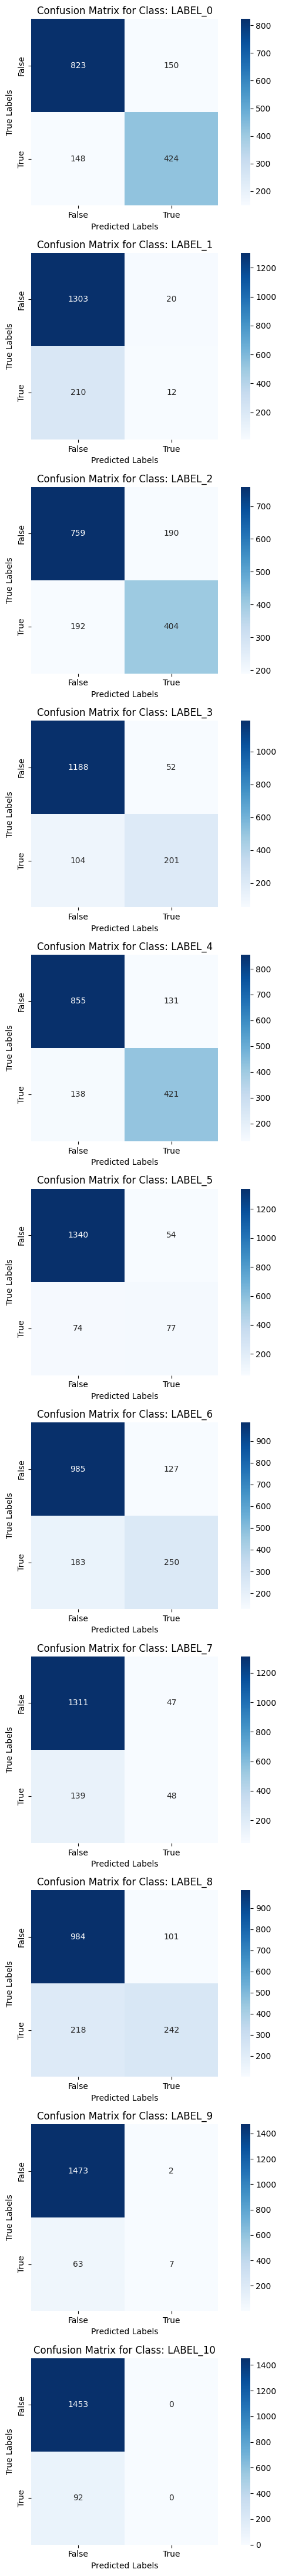

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
def plot_confusion_matrix(valid_labels, valid_preds, class_labels):
    """
    Plots a confusion matrix for each individual class.

    Args:
        valid_labels (array-like): True labels of the validation data.
        valid_preds (array-like): Predicted labels of the validation data.
        class_labels (list): List of class names for the labels.
    """
    # Compute the multilabel confusion matrix
    mcm = multilabel_confusion_matrix(valid_labels, valid_preds)

    # Plot confusion matrices for each individual class
    num_classes = len(class_labels)
    fig, axes = plt.subplots(num_classes, 1, figsize=(8, num_classes * 4), squeeze=False)

    for i, (cm, label) in enumerate(zip(mcm, class_labels)):
        ax = axes[i, 0]
        sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", ax=ax)
        ax.set_title(f'Confusion Matrix for Class: {label}')
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')
        ax.set_xticklabels(['False', 'True'])
        ax.set_yticklabels(['False', 'True'])
        ax.set_aspect('equal')

    plt.tight_layout()
    plt.show()

plot_confusion_matrix(valid_labels, valid_preds, class_labels=list(config.id2label.values()))

In [ ]:
print("Validation Macro F1 Score: ", f1_score(valid_labels,valid_preds, average= 'macro'), "\nValidation Hamming Loss: ",hamming_loss(valid_labels,valid_preds))

Validation Macro F1 Score:  0.47959222417453146 
Validation Hamming Loss:  0.14327743453957045


In [ ]:
best_model_checkpoint_step = trainer.state.best_model_checkpoint.split('-')[-1]
print(f"The best model was saved at step {best_model_checkpoint_step}.")

The best model was saved at step 850.


In [ ]:
# Read the CSV file into a pandas DataFrame
path = "/content/drive/MyDrive/BUAN 6342/test.csv"
df_test = pd.read_csv(path)

df_test.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-01559,@Adnan__786__ @AsYouNotWish Dont worry Indian ...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1,2018-03739,"Academy of Sciences, eschews the normally sobe...",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2,2018-00385,I blew that opportunity -__- #mad,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3,2018-03001,This time in 2 weeks I will be 30... 😥,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4,2018-01988,#Deppression is real. Partners w/ #depressed p...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [ ]:
# Replace "NONE" labels with 0s
label_columns = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
df_test[label_columns] = df_test[label_columns].replace('NONE', 0)

# Verify the changes
df_test.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-01559,@Adnan__786__ @AsYouNotWish Dont worry Indian ...,0,0,0,0,0,0,0,0,0,0,0
1,2018-03739,"Academy of Sciences, eschews the normally sobe...",0,0,0,0,0,0,0,0,0,0,0
2,2018-00385,I blew that opportunity -__- #mad,0,0,0,0,0,0,0,0,0,0,0
3,2018-03001,This time in 2 weeks I will be 30... 😥,0,0,0,0,0,0,0,0,0,0,0
4,2018-01988,#Deppression is real. Partners w/ #depressed p...,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cleaned_tweets_test = preprocessor.fit_transform(df_test['Tweet'].values)

<ipython-input-16-0e4722500373>:33: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
df_test['cleaned_tweets_test']= cleaned_tweets_test
df_test.head()
X_test = df_test['cleaned_tweets_test'].values.tolist()
y_test = df_test[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']].values.tolist()
y_test_float = torch.tensor(y_test, dtype=torch.float32)
test_split = Dataset.from_dict({
    'texts': X_test,
    'labels': y_test_float
})

In [ ]:
test_split

Dataset({
    features: ['texts', 'labels'],
    num_rows: 3259
})

In [ ]:
test_set_tokenized = test_split.map(tokenize_fn, batched=True)

Map:   0%|          | 0/3259 [00:00<?, ? examples/s]

In [ ]:
training_args = TrainingArguments(
    output_dir=str(model_folder),
    per_device_eval_batch_size=16,
    do_train=False,
    do_eval=True,
    metric_for_best_model="f1_score",
    greater_is_better=True,
    logging_strategy='epoch',  # Log metrics at the end of each epoch
    report_to='wandb',
    run_name='tweet_hf_trainer',
    fp16=True,
)

In [ ]:
test_trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=test_set_tokenized,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
test_results = test_trainer.evaluate()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [ ]:
test_predictions = trainer.predict(test_set_tokenized)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [ ]:
test_predictions.metrics

{'test_loss': 0.44652479887008667,
 'test_hamming_loss': 0.18100923317247344,
 'test_f1_score': 0.0,
 'test_runtime': 3.4749,
 'test_samples_per_second': 937.878,
 'test_steps_per_second': 58.707}

In [ ]:
test_predictions.label_ids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_preds = (test_predictions.predictions > 0).astype('int32')
test_labels = test_predictions.label_ids

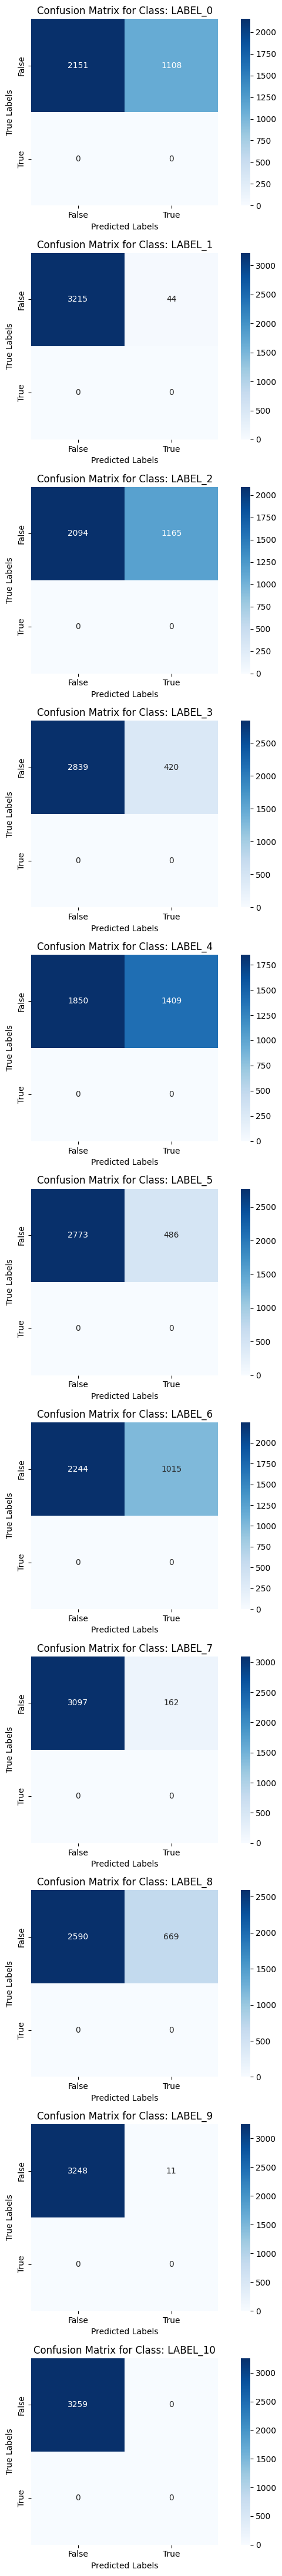

In [ ]:
plot_confusion_matrix(test_labels, test_preds, class_labels=list(config.id2label.values()))

In [ ]:
print("Test Macro F1 Score: ", f1_score(test_labels,test_preds, average= 'macro'), "\nTest Hamming Loss: ",hamming_loss(test_labels,test_preds))

Test Macro F1 Score:  0.0 
Test Hamming Loss:  0.18100923317247344


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
